# Create CSV graphing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.models import load_model


df = pd.read_csv('Customer_DB.csv')

df.head()

,ID,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,NumTotalTrades,...,MaxDelqEver_0.4,MaxDelqEver_0.6000000000000001,MaxDelqEver_0.8,MaxDelqEver_1.0,MaxDelq2PublicRecLast12M_0.0,MaxDelq2PublicRecLast12M_0.2,MaxDelq2PublicRecLast12M_0.4,MaxDelq2PublicRecLast12M_0.6000000000000001,MaxDelq2PublicRecLast12M_0.8,MaxDelq2PublicRecLast12M_1.0
0,1,0.360656,0.177278,0.017621,0.251572,0.253165,0.157895,0.000000,0.83,0.221154,...,1,0,0,0,0,0,1,0,0,0
1,2,0.459016,0.069913,0.066079,0.116352,0.025316,0.210526,0.210526,1.00,0.067308,...,0,0,0,0,0,0,0,0,0,1
2,3,0.557377,0.079900,0.022026,0.062893,0.113924,0.000000,0.000000,1.00,0.086538,...,0,0,0,0,1,0,0,0,0,0
3,4,0.540984,0.208489,0.004405,0.216981,0.354430,0.052632,0.052632,0.93,0.288462,...,0,0,0,0,1,0,0,0,0,0
4,5,0.786885,0.413233,0.118943,0.402516,0.151899,0.000000,0.000000,1.00,0.115385,...,0,0,0,0,1,0,0,0,0,0


In [2]:
data = pd.read_csv("Customer_DB.csv")
Risk_Prediction_Model = load_model('model/Risk_Prediction_Model.h5')

input_data = data.drop(columns=['ID'])

predictions = Risk_Prediction_Model.predict(input_data)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-09-18 16:49:51.738151: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-18 16:49:51.738173: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-09-18 16:49:51.897082: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-18 16:49:51.930918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


309/309 [==============================] - 1s 2ms/step


In [3]:
df['Prediction'] = predictions
df['Category'] = df['Prediction'].apply(lambda row: 1 if row >= 0.5 else 0)
df = df.drop(labels = ['Prediction'], axis=1)

In [4]:
data.head()

,ID,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,NumTotalTrades,...,MaxDelqEver_0.4,MaxDelqEver_0.6000000000000001,MaxDelqEver_0.8,MaxDelqEver_1.0,MaxDelq2PublicRecLast12M_0.0,MaxDelq2PublicRecLast12M_0.2,MaxDelq2PublicRecLast12M_0.4,MaxDelq2PublicRecLast12M_0.6000000000000001,MaxDelq2PublicRecLast12M_0.8,MaxDelq2PublicRecLast12M_1.0
0,1,0.360656,0.177278,0.017621,0.251572,0.253165,0.157895,0.000000,0.83,0.221154,...,1,0,0,0,0,0,1,0,0,0
1,2,0.459016,0.069913,0.066079,0.116352,0.025316,0.210526,0.210526,1.00,0.067308,...,0,0,0,0,0,0,0,0,0,1
2,3,0.557377,0.079900,0.022026,0.062893,0.113924,0.000000,0.000000,1.00,0.086538,...,0,0,0,0,1,0,0,0,0,0
3,4,0.540984,0.208489,0.004405,0.216981,0.354430,0.052632,0.052632,0.93,0.288462,...,0,0,0,0,1,0,0,0,0,0
4,5,0.786885,0.413233,0.118943,0.402516,0.151899,0.000000,0.000000,1.00,0.115385,...,0,0,0,0,1,0,0,0,0,0


In [5]:
# Save CSV file for potential easy separate access

df.to_csv('Graph_CSV.csv')

In [49]:
# Code to create input for Graphs:
 # input('Customer ID: ')
import seaborn as sns
def graph_generator(customer_id, graph_type, variable):
    id = customer_id
    new_df = df
    # create a new DF each time so that the original file is not overwritten in the category section
    if graph_type == "BoxPlot":
        new_df['Category'][new_df['ID'] == id] = 1.5 # To the right of the two target columns
        ax1 = plt.subplot()
        ax1 = sns.boxplot(data = new_df, x = 'Category', y = variable)
        ax1.set_xticklabels(['Low Risk', 'High Risk', 'You'])
        plt.xlabel('Category')
        plt.ylabel('Normalised External Risk Estimate')
        plt.title('Model Comparison of External Risk Estimate')
        plt.show()
        """
         elif graph_type == "Histogram":
        x_val = new_df[variable][new_df['ID'] == id]
        ax1 = plt.subplot()
        ax1 = sns.histplot(data=new_df, x=variable, hue='Category', common_norm=False, labels = ['Low-Risk', 'High Risk'])
        plt.vlines(x= x_val, ymin=0, ymax= 600, label = "You")
        plt.xlabel('Category')
        plt.ylabel('Normalized External Risk Estimate')
        plt.title('Model Comparison of External Risk Estimate')
        plt.legend(title='Category')  # Add a legend for the 'Category' hue
        plt.show()
        """


    elif graph_type == "Distribution Plot":
        x_val = new_df[variable][new_df['ID'] == id]
        ax1 = plt.subplot()
        ax1 = sns.kdeplot(data=new_df, x=variable, hue='Category', fill=True)
    
        plt.vlines(x=x_val, ymin=0, ymax=2, label="You", colors='red', linestyle='dashed')  # Adjust linestyle and color as needed
        plt.xlabel('Normalized External Risk Estimate')
        plt.ylabel('Distribution')
        plt.title('Model Comparison of External Risk Estimate')
    
        # Set the legend labels using plt.legend
        plt.legend(title='Risk Category', labels=["Low Risk", "High Risk", "You"])
    
        plt.show()
        plt.clf()


    
    else:
        pass



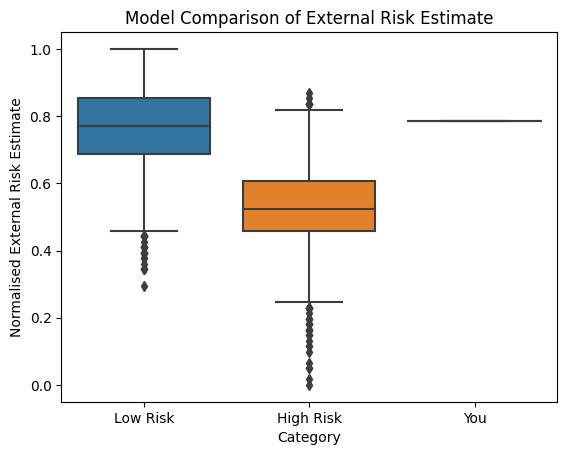

In [50]:
graph_generator(5, 'BoxPlot', 'ExternalRiskEstimate')

/var/folders/13/lngr17tj6457_2v2xp487rc40000gn/T/ipykernel_90840/1033660896.py:44: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax1 = sns.kdeplot(data=new_df, x=variable, hue='Category', fill=True)


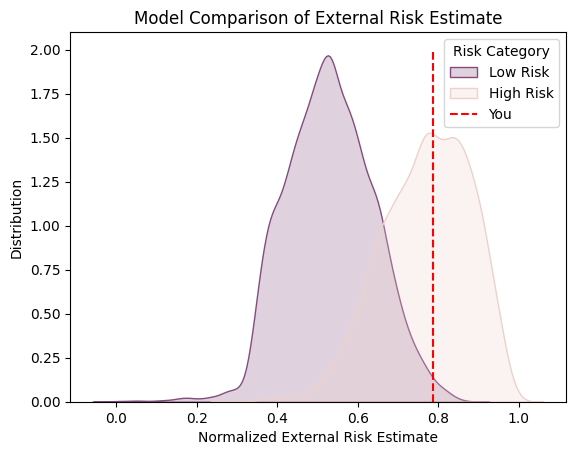

<Figure size 640x480 with 0 Axes>

In [51]:
graph_generator(5, "Distribution Plot", 'ExternalRiskEstimate')